# Problem Statement

In India, whenever we have festivals in our calendars, our support staff/ helpers expect festival rewards. We roughly calculate this reward in proportion to the monthly salary we pay to them. 

A 12-hour helper is likely to get more reward amount, while a 1-hour helper would get a smaller reward amount. If you’re heading a large organization, you may like to develop a model to suggest the reward amounts of people in support staff. 

To do, you decide to collate the data for last ten such festive instances.Use this data to predict the reward amount for the upcoming festival !

In [2]:
# Importing libraries

import numpy as np   
import pandas as pd    
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn import metrics
import matplotlib.pyplot as plt   
import matplotlib.style

In [3]:
df = pd.read_csv("Festival.csv")

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype
---  ------    --------------  -----
 0   Instance  10 non-null     int64
 1   Years     10 non-null     int64
 2   Salary    10 non-null     int64
 3   Amount    10 non-null     int64
dtypes: int64(4)
memory usage: 448.0 bytes


In [5]:
df.describe()

,Instance,Years,Salary,Amount
count,10.00000,10.000000,10.000000,10.000000
mean,5.50000,3.100000,4150.000000,560.000000
std,3.02765,1.595131,1361.371857,225.831796
min,1.00000,1.000000,1700.000000,250.000000
25%,3.25000,2.250000,3300.000000,412.500000
50%,5.50000,3.000000,4450.000000,575.000000
75%,7.75000,3.750000,5137.500000,687.500000
max,10.00000,6.000000,6000.000000,900.000000


In the absence of any indepdenant variables, the best estimate of the award amount is the mean of the last 10 reward amounts.

In [6]:
# Mean of the reward amount
Predicted_Amount = df.Amount.mean()
print("Predicted Reward Amount is",Predicted_Amount)

Predicted Reward Amount is 560.0


## Simple Linear Regression

We will now consider the salary paid information as an additional variable for predicting the award amount and build a simple linear regression model using "Salary" as an indepdendant variable.

*Amout = b0 + b1 x Salary + err*

Let us first find the correlation between Salary and Amount.

In [7]:
df.iloc[:,2:4].corr()

,Salary,Amount
Salary,1.000000,0.853822
Amount,0.853822,1.000000


We see that the correlation between Amount and Salaryis 0.85382. Salary is significantly impacting reward amount.

In [8]:
# Copy all the predictor variables into X dataframe
x = df[['Salary']]

# Copy target into the y dataframe. 
y = df[['Amount']]

In [9]:
# invoke the LinearRegression function and find the bestfit model on the salary data
regression_model = LinearRegression()

In [10]:
fit1 = regression_model.fit(x, y)

In [11]:
# Coefficient for independant variable
for idx, col_name in enumerate(x):
    print("The coefficient for {} is {}".format(col_name, regression_model.coef_[0][idx]))

The coefficient for Salary is 0.14163669064748202


In [12]:
# Let us check the intercept for the model

intercept = regression_model.intercept_[0]
print("The intercept of the model is {}".format(intercept))

The intercept of the model is -27.79226618705036


The linear regression function for estimating reward amount is *y = -27.79226 + 0.141636*Salary*

In [13]:
# Regression Score R2

regression_model.score(x,y)

0.7290123783326279

72.90 % variation in the reward amount is explained by the regression model.

## Multilinear regression model

We can further improve the regression model to predict the reward amount by adding one more variable *Years*. We will now build a multi-linear regression model using Salary (x1) and Years (x2) independent variable.

Let us first find the correlation between Salary, Years and Amount.

In [14]:
cor_mat = df.iloc[:,1:4].corr()
cor_mat

,Years,Salary,Amount
Years,1.000000,0.122799,0.320781
Salary,0.122799,1.000000,0.853822
Amount,0.320781,0.853822,1.000000


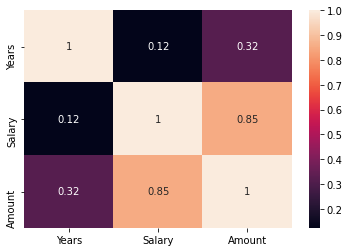

In [15]:
sns.heatmap(cor_mat,annot=True);
plt.show()

We see that there exists a poor correlation between Amount and Years.

In [16]:
# Copy all the predictor variables into X dataframe
x1_2 = df[['Salary','Years']]

# Copy target into the y dataframe. 
y = df[['Amount']]

In [17]:
print(x1_2)

   Salary  Years
0    1700      4
1    5400      3
2    3200      1
3    4400      3
4    4950      3
5    2550      2
6    3600      6
7    6000      5
8    4500      1
9    5200      3


In [18]:
# invoke the LinearRegression function and find the bestfit model on the salary data
MLR_model = LinearRegression()

In [19]:
fit2 = MLR_model.fit(x1_2, y)

In [20]:
# Coefficient for independant variable
for idx, col_name in enumerate(x1_2):
    print("The coefficient for {} is {}".format(col_name, fit2.coef_[0][idx]))

The coefficient for Salary is 0.13717066441261844
The coefficient for Years is 31.038882332302


In [21]:
# Let us check the intercept for the model

intercept1 = fit2.intercept_[0]
print("The intercept of the model is {}".format(intercept1))

The intercept of the model is -105.47879254250267


The linear regression function for estimating reward amount is *y = -105.47879 + 0.13717*Salary + 31.03888*Years*

In [22]:
# Regression Score R2
fit2.score(x1_2,y)

0.7763532294126474

77.63% variation in the reward amount is explained by the regression model.

You can see that as we add more predictors, the R2 value increases. we see that R-squared value for the reward amount prediction model has increased from 0.729 to 0.776.

## Linear Regression using statsmodels

In [23]:
import statsmodels.formula.api as smf


In [24]:
expr = 'Amount ~ Salary + Years'

In [25]:
lm1 = smf.ols(formula= expr, data = df.drop("Instance", axis=1)).fit()
lm1.params

Intercept   -105.478793
Salary         0.137171
Years         31.038882
dtype: float64

In [26]:
print(lm1.summary())

C:\Users\Milind\Anaconda3\lib\site-packages\scipy\stats\stats.py:1604: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=10
  "anyway, n=%i" % int(n))


                            OLS Regression Results                            
Dep. Variable:                 Amount   R-squared:                       0.776
Model:                            OLS   Adj. R-squared:                  0.712
Method:                 Least Squares   F-statistic:                     12.15
Date:                Sun, 04 Jul 2021   Prob (F-statistic):            0.00529
Time:                        11:03:35   Log-Likelihood:                -60.372
No. Observations:                  10   AIC:                             126.7
Df Residuals:                       7   BIC:                             127.7
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   -105.4788    143.810     -0.733      0.4

* The overall P value is less than alpha, so rejecting H0 and accepting Ha that atleast 1 regression co-efficient is not 0.
* Here all regression co-efficients are not 0

### Happy Learning